Importing libraries

In [44]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#to make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [3]:
## importing tensorflow library

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


Data
1. Title: Auto-Mpg Data - https://archive.ics.uci.edu/ml/datasets/Auto+MPG

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values


In [31]:
## https://archive.ics.uci.edu/ml/datasets/Auto+MPG

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'HorsePower', 'Weight', 'Acceleration', 'ModelYear', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [8]:
dataset.head()

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,ModelYear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Data Preprocessing

In [14]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
HorsePower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [20]:
dataset[dataset.HorsePower.isna()]

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,ModelYear,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [32]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
HorsePower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   HorsePower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   ModelYear     392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [26]:
#converting Origin column to one-hot encoding
type(pd.get_dummies(dataset.Origin, prefix='Origin'))

pandas.core.frame.DataFrame

In [33]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.Origin, prefix='Origin')], axis=1)
dataset.drop('Origin', axis=1, inplace=True)

In [35]:
dataset.tail()

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,ModelYear,Origin_1,Origin_2,Origin_3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [37]:
##Spliting dataset

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index
                            )

In [38]:
print(dataset.shape, train_dataset.shape, test_dataset.shape)

(392, 10) (314, 10) (78, 10)


In [41]:
#data basic stats
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
HorsePower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
ModelYear,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin_1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Origin_2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Origin_3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [42]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [43]:
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [47]:
## defining a function to plot data for single features wise
def plot(feature, x=None, y=None):
  #plt.figure(figsize=(10,8))
  plt.scatter(train_features[feature], train_labels, label='Data')
  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')

  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()


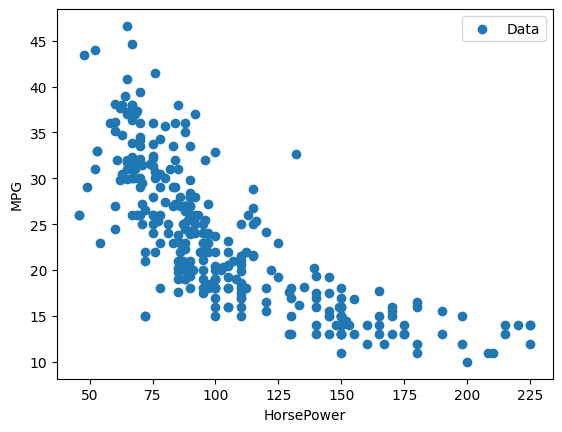

In [48]:
plot('HorsePower')

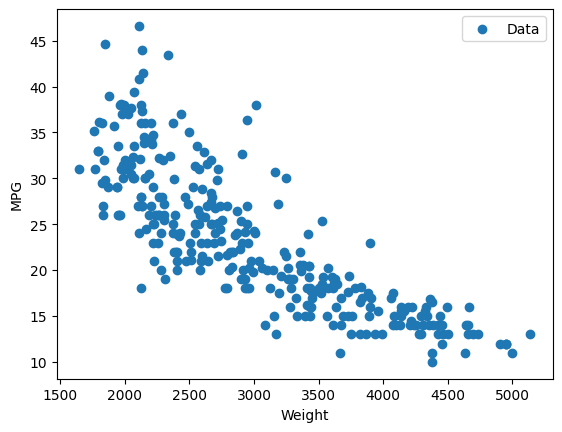

In [49]:
plot('Weight')

Normalize Data

In [50]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
HorsePower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
ModelYear,75.898089,3.675642
Origin_1,0.624204,0.485101
Origin_2,0.178344,0.383413
Origin_3,0.197452,0.398712


Normalizing data

In [51]:
#normalizing data using tensorflow
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [52]:
normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.624,    0.178,    0.197]], dtype=float32)

In [57]:
#normalization : input - mean / stddev

first = np.array(train_features[:1])
print(first)
print(normalizer(first).numpy())

[[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
[[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [106]:
from numpy.lib import tri
## we will work here first with single feature for prediction to under the 2d data scenario
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense



feature='HorsePower'
single_feature = train_features[feature]
print(single_feature.shape, train_features.shape)


#normalizing single_feature
single_feature_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)

##Note without input shape and axis info specified for Normalization, the normalizer would throw error in model building
## https://github.com/keras-team/keras/issues/15348
##add "input_shape=[1,], axis=None" in the Normalization function
##Ex:single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)


(314,) (314, 9)


In [101]:
np.array(single_feature)

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
       180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
        90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
        67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
        78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
        76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
       215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
       145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
        65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
        70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
       170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
        67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
        95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,  86., 150.,
        70., 107.,  80., 150., 105., 100., 145.,  8

In [107]:
#### def adapt(data, batch_size=None, steps=None)
##data: The data to train on. It can be passed either as a  tf.data.Dataset, or as a numpy array.

single_feature_normalizer.adapt(np.array(single_feature)) 

In [105]:
single_feature_normalizer

Building Single Feature Model

In [108]:
##building model

single_feat_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1)
])

In [109]:
single_feat_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [113]:
##loss and optimizer

loss = keras.losses.MeanAbsoluteError()
opt = keras.optimizers.Adam(learning_rate=0.1) ##with default lr the model wasn't performing well

single_feat_model.compile(loss=loss, optimizer=opt)

In [114]:
##Model training

history=single_feat_model.fit(
    train_features[feature], train_labels,
    epochs=50,
    verbose=1,
    validation_split=0.2

)

Epoch 1/50
8/8 [==============================] - 0s 20ms/step - loss: 22.4878 - val_loss: 22.5365
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 21.6607 - val_loss: 21.7365
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 20.8635 - val_loss: 20.9361
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 20.0630 - val_loss: 20.1361
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 19.2658 - val_loss: 19.3364
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 18.4611 - val_loss: 18.5363
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 17.6618 - val_loss: 17.7363
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 16.8621 - val_loss: 16.9364
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 16.0611 - val_loss: 16.1363
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 15.2615 - val_loss: 15.3362
Epoch 11/50
8/8 [=

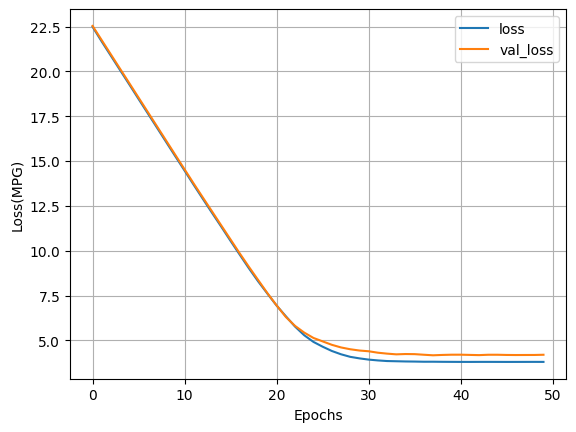

In [115]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss(MPG)')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Single Feature Model Evaluation

In [116]:
single_feat_model.evaluate(
    test_features[feature], test_labels
)

3/3 [==============================] - 0s 4ms/step - loss: 3.6429


3.6429004669189453

38.0 240.0
7/7 [==============================] - 0s 3ms/step


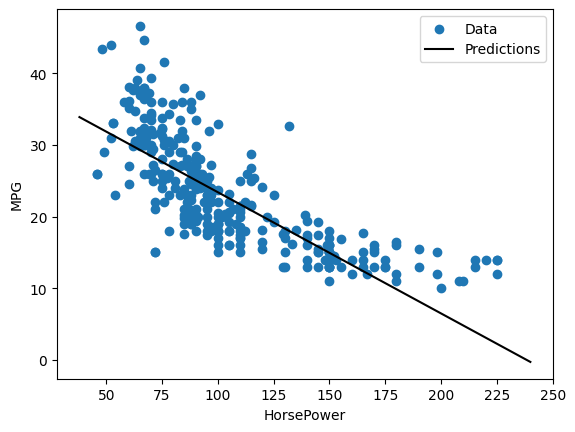

In [119]:
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
print(range_min, range_max)

x = tf.linspace(range_min, range_max, 200)
y = single_feat_model.predict(x)

plot(feature, x, y)

Building a Deep Neural Network

In [120]:
dnn_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

In [121]:
dnn_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam())
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_8 (Dense)             (None, 64)                128       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,244
Trainable params: 2,241
Non-trainable params: 3
_________________________________________________________________


In [122]:
dnn_model.fit(
    train_features[feature], train_labels,
    epochs=50,
    verbose=1,
    validation_split=0.2

)

Epoch 1/50
8/8 [==============================] - 1s 22ms/step - loss: 23.1870 - val_loss: 23.5742
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 22.9492 - val_loss: 23.3093
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 22.7067 - val_loss: 23.0633
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 22.4708 - val_loss: 22.7971
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 22.2021 - val_loss: 22.4899
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 21.8817 - val_loss: 22.1150
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 21.4871 - val_loss: 21.6425
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 20.9798 - val_loss: 21.0619
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 20.3781 - val_loss: 20.3469
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 19.6310 - val_loss: 19.4950
Epoch 11/50
8/8 [=

In [123]:
dnn_model.evaluate(test_features[feature], test_labels)

3/3 [==============================] - 0s 6ms/step - loss: 3.0331


3.033137083053589

7/7 [==============================] - 0s 2ms/step


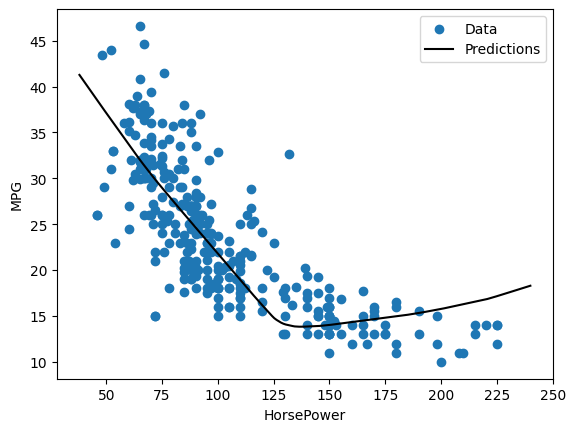

In [124]:
x= tf.linspace(range_min, range_max, 200)
y= dnn_model.predict(x)
plot(feature, x, y)

Note, we see hear non linear plot, relu adds non-linearity to the model

Build Model using all features

In [125]:
dnn_model_all_feat = keras.models.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    
])

In [126]:
dnn_model_all_feat.compile(loss=loss, optimizer=tf.keras.optimizers.Adam())


In [127]:
dnn_model_all_feat.fit(
    train_features, train_labels,
    epochs=50,
    verbose=1,
    validation_split=0.2
    )

Epoch 1/50
8/8 [==============================] - 2s 59ms/step - loss: 22.6755 - val_loss: 22.7167
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 21.8619 - val_loss: 21.8351
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 20.9532 - val_loss: 20.7975
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 19.8638 - val_loss: 19.4721
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 18.4375 - val_loss: 17.7700
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 16.6004 - val_loss: 15.5800
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 14.4351 - val_loss: 13.2318
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - loss: 12.0968 - val_loss: 10.9237
Epoch 9/50
8/8 [==============================] - 0s 11ms/step - loss: 9.6344 - val_loss: 8.2007
Epoch 10/50
8/8 [==============================] - 0s 23ms/step - loss: 7.0108 - val_loss: 5.5526
Epoch 11/50
8

In [128]:
dnn_model_all_feat.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 1.7692


1.7691949605941772